In [1]:
import gzip
import gensim
import logging
import numpy as np

from sklearn.manifold import TSNE
from matplotlib.font_manager import *  
import matplotlib.pyplot as plt 

In [2]:
#模型载入
title4w2v_model = gensim.models.Word2Vec.load('title4w2v')
note4w2v_model = gensim.models.Word2Vec.load('note4w2v')


In [3]:
title_word = title4w2v_model.wv.index_to_key#词表
title_vec = title4w2v_model.wv[title4w2v_model.wv.index_to_key]#各个词词向量

note_word = note4w2v_model.wv.index_to_key#词表
note_vec = note4w2v_model.wv[note4w2v_model.wv.index_to_key]#各个词词向量

In [4]:
# title_tSNE_vec = TSNE(n_components=2).fit_transform(title_vec)
# note_tSNE_vec = TSNE(n_components=2).fit_transform(note_vec)

# #转存
# np.save('title_tSNE_vec.npy',title_tSNE_vec)
# np.save('note_tSNE_vec.npy',note_tSNE_vec)

#读入
title_tSNE_vec = np.load('title_tSNE_vec.npy')
note_tSNE_vec = np.load('note_tSNE_vec.npy')

In [9]:
for similar_word, a in note4w2v_model.wv.most_similar('三亚', topn=30):
    print(a)
    

0.7253665328025818
0.6919431090354919
0.6264577507972717
0.5303432941436768
0.5300281643867493
0.5221107602119446
0.5205460786819458
0.5028522610664368
0.5026313066482544
0.4881139099597931
0.47918206453323364
0.4771348237991333
0.4767457842826843
0.47557440400123596
0.46971216797828674
0.456061989068985
0.45411184430122375
0.44439494609832764
0.4348229765892029
0.4162190556526184
0.41098785400390625
0.40858787298202515
0.4069057106971741
0.40547698736190796
0.40461549162864685
0.40062129497528076
0.39973345398902893
0.3982461392879486
0.39796966314315796
0.39507031440734863


In [11]:
note4w2v_model.wv.get_vector('三亚').shape

(128,)

In [42]:
#keys = ['酒店','景点','不错','三亚','吃','带','走','感觉','厦门','好吃','喜欢','上海','亚龙湾','拍照']
keys = ['三亚','上海','南京','厦门','西湖','鼓浪屿','迪士尼','亚龙湾','吃','住','走','想','酒店','客栈','景点','不错','美好','喜欢','好吃','好玩'] 

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in note4w2v_model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(note4w2v_model.wv.get_vector(similar_word))
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

    



In [43]:
tsne_model_en_2d = TSNE(perplexity=8, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [37]:
tsne_model_en_2d

TSNE(init='pca', n_iter=3500, perplexity=15, random_state=32)

In [65]:
keys

['三亚',
 '上海',
 '南京',
 '厦门',
 '西湖',
 '鼓浪屿',
 '迪士尼',
 '亚龙湾',
 '吃',
 '住',
 '走',
 '想',
 '酒店',
 '客栈',
 '景点',
 '不错',
 '美好',
 '喜欢',
 '好吃',
 '好玩']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

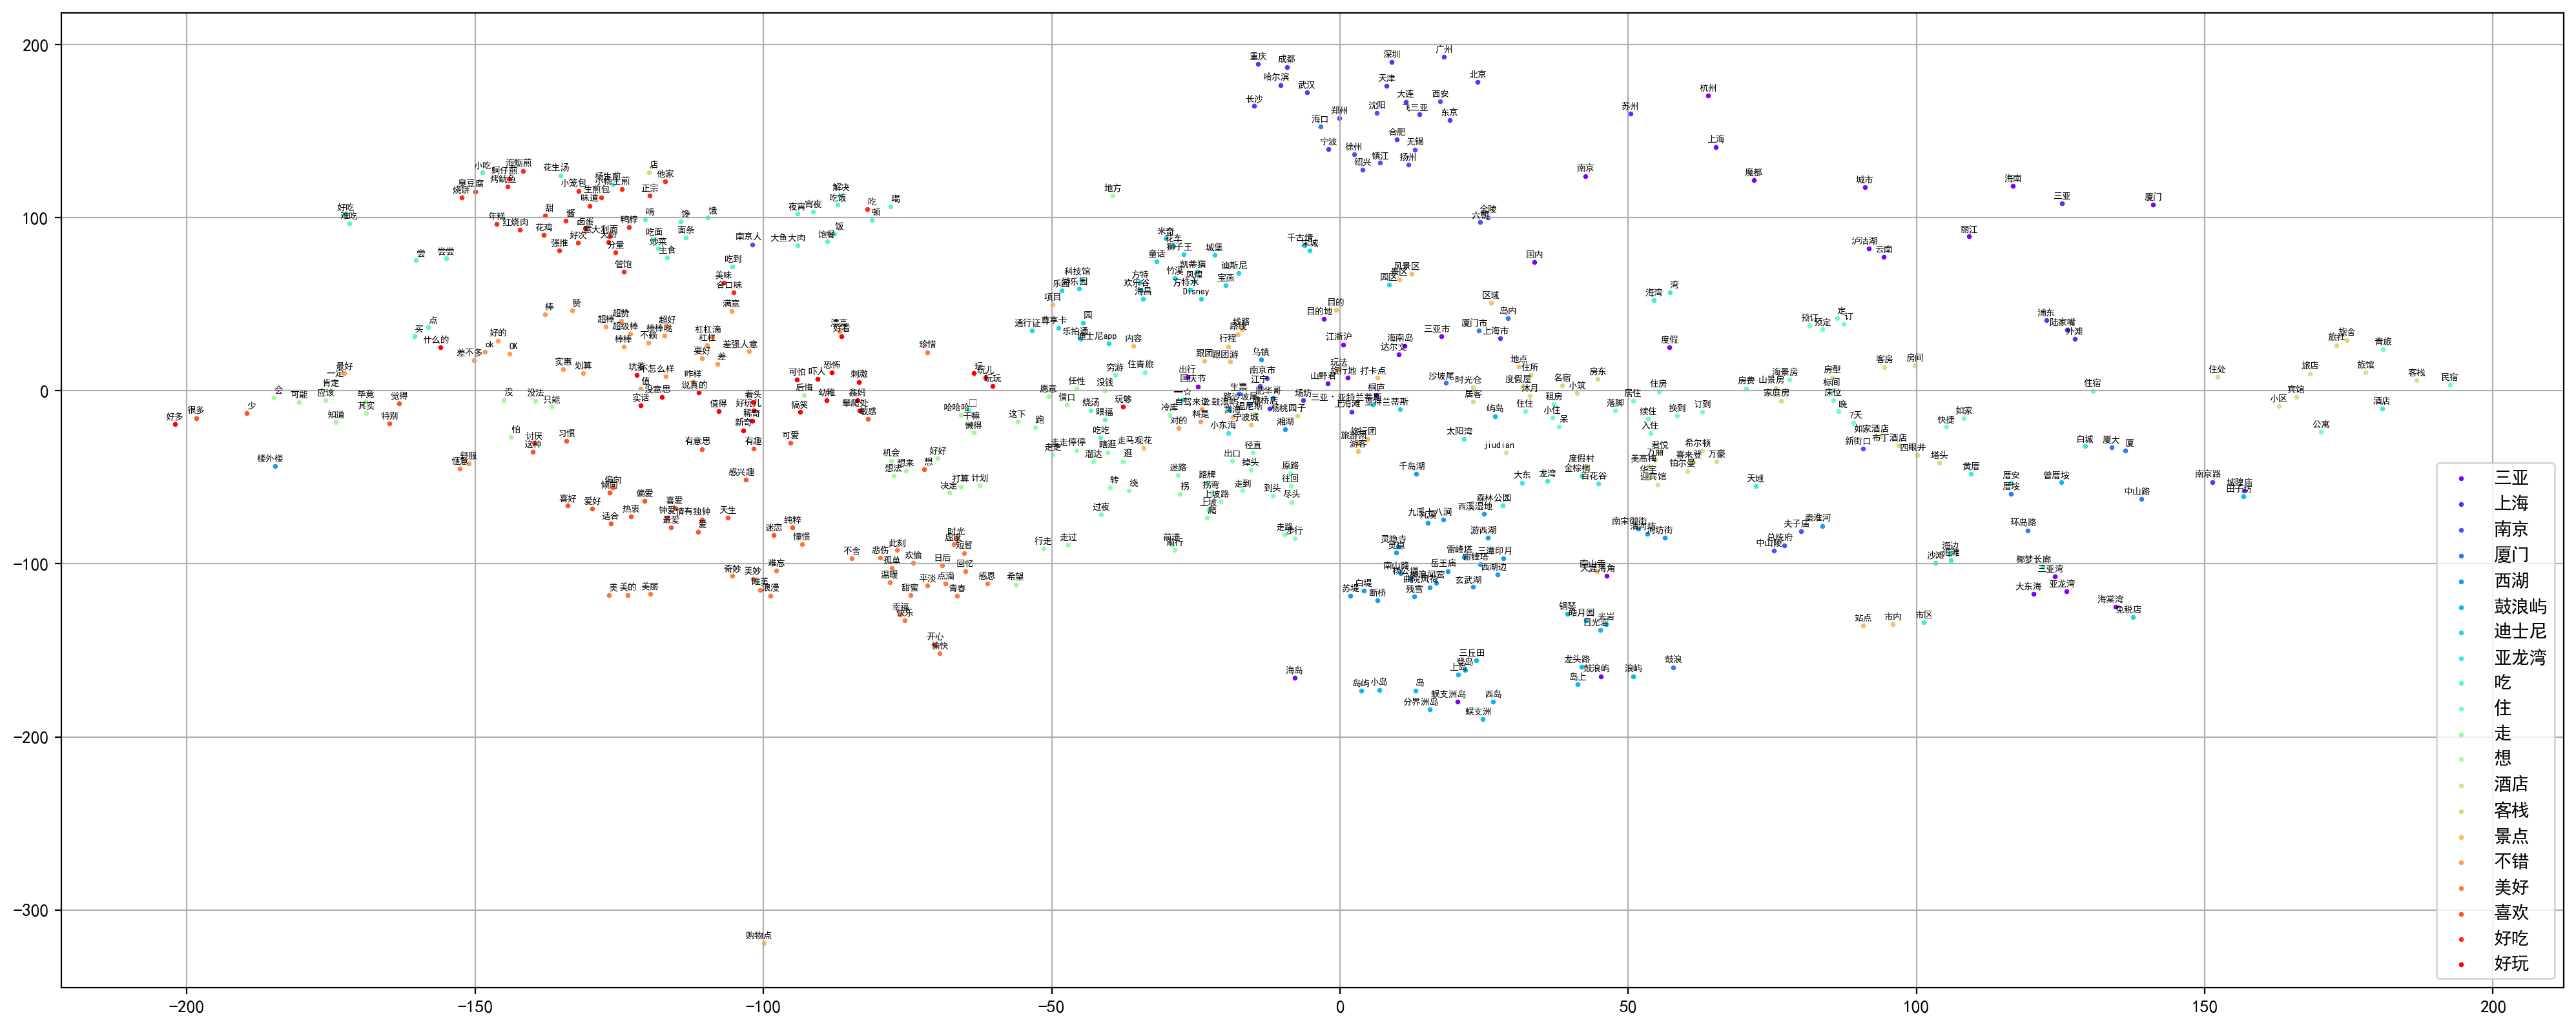

In [66]:
from sklearn.manifold import TSNE
 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
# % matplotlib inline
 
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(25, 10),dpi=200)
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    
    accum_words = []
    
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        rm_index = []#需要删除的索引
        total_index = set(range(embeddings.shape[0]))
        use_label = []#使用的词
        for index,each_cluster_word in enumerate(words):
            if each_cluster_word not in accum_words:#没识别过
                accum_words.append(each_cluster_word)
                use_label.append(each_cluster_word)
            else:#说明出现过
                rm_index.append(index)
        left_index = total_index - set(rm_index)
        left_index = list(left_index)
                
        x = embeddings[left_index,0]
        y = embeddings[left_index,1]
        
        plt.scatter(x,y,c=color,label=label,s=3)
        for i, word in enumerate(use_label):
            plt.annotate(word, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=5)
    plt.legend(loc=4)
    plt.grid(True)
    #plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()
    

tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)


In [61]:
set(range(20)) - set([1,2,3])

{0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

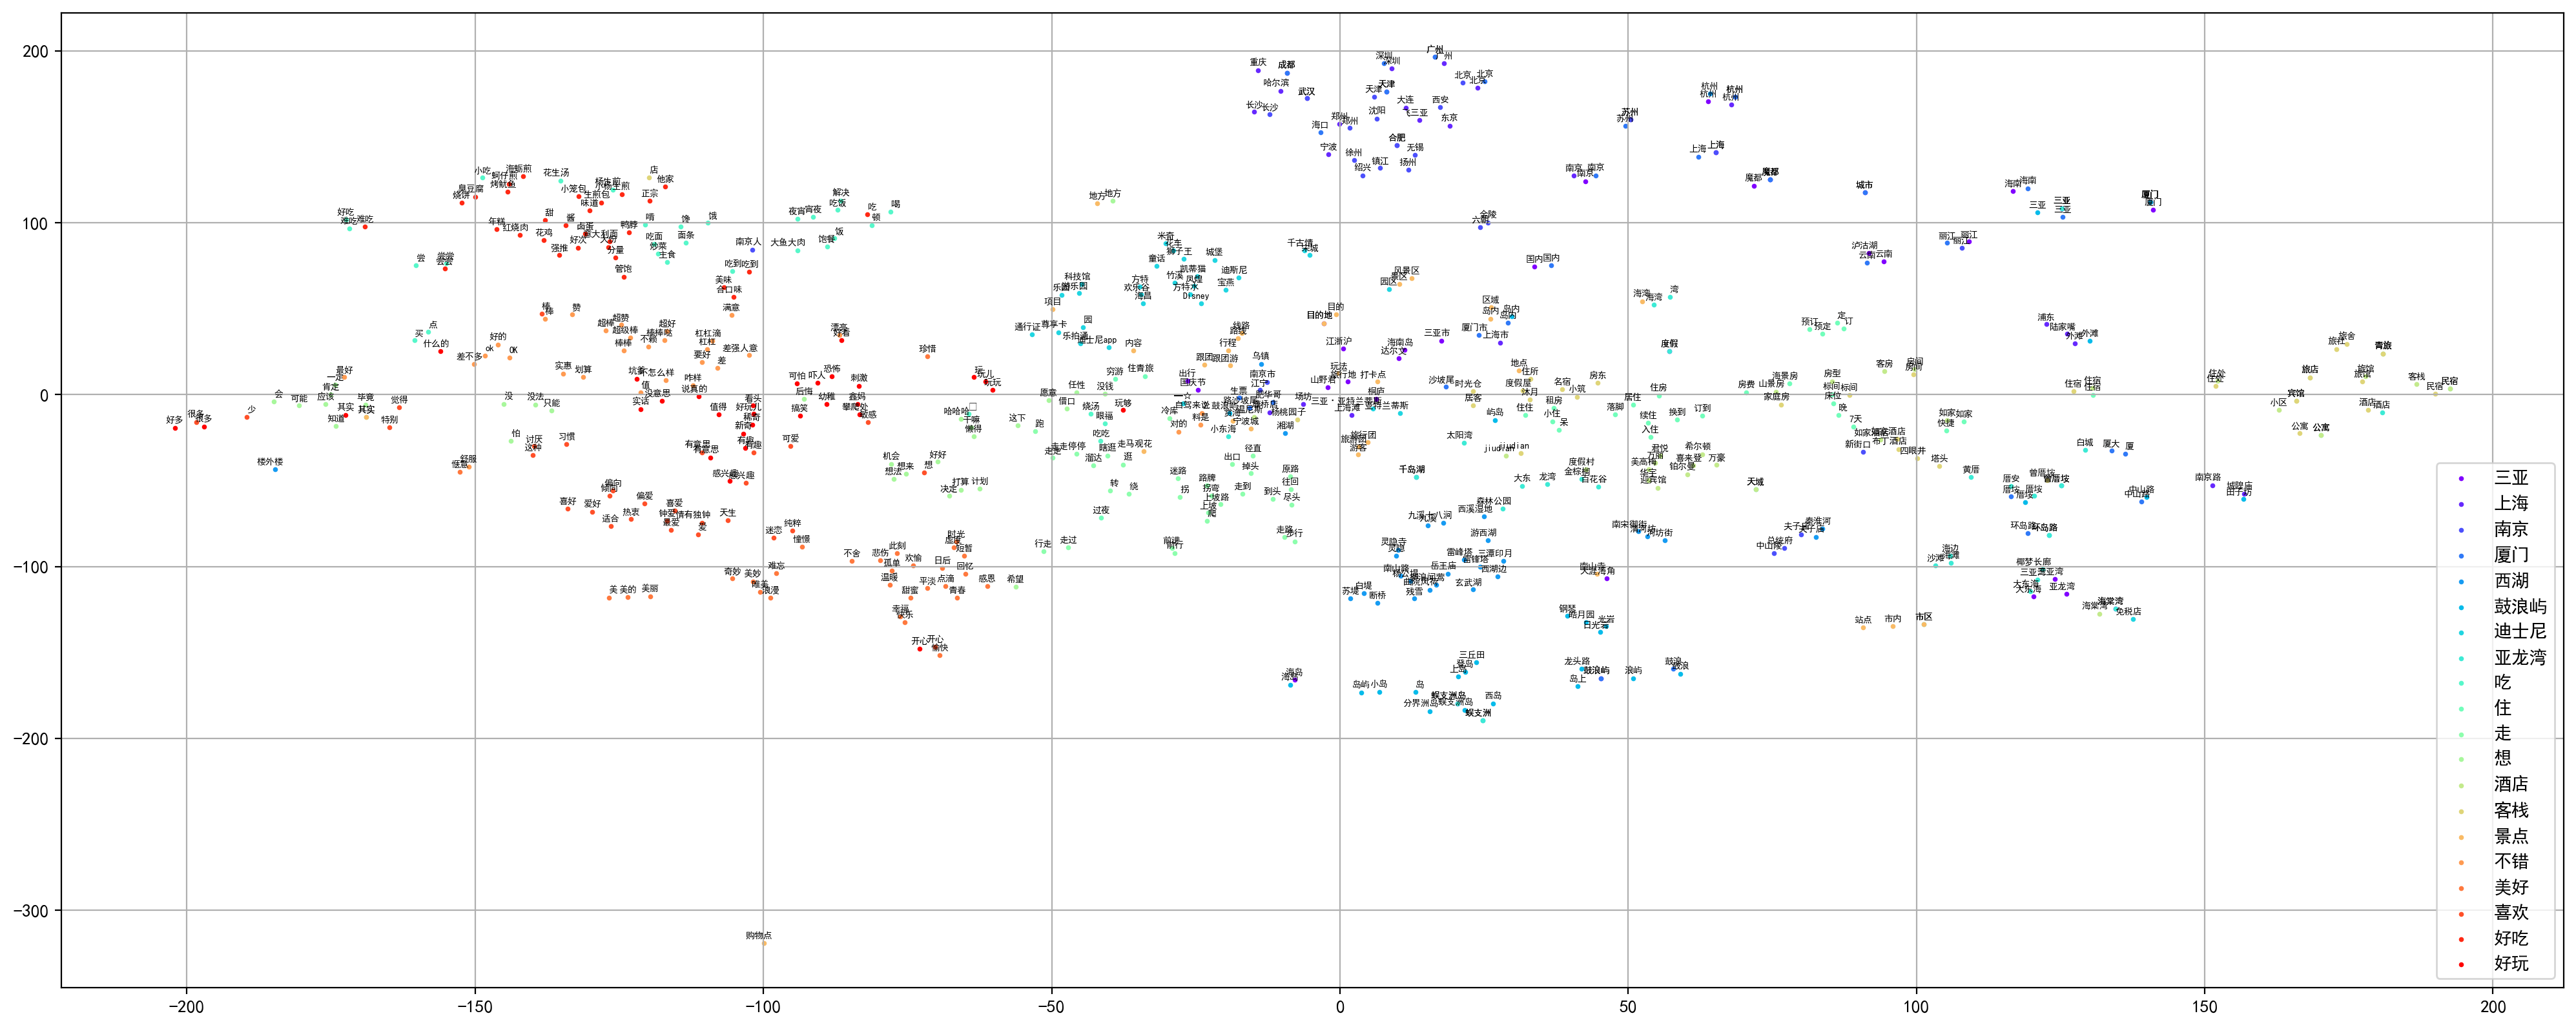

In [44]:
from sklearn.manifold import TSNE
 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
# % matplotlib inline
 
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(25, 10),dpi=200)
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, label=label,s=3)
        for i, word in enumerate(words):
            plt.annotate(word, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=5)
    plt.legend(loc=4)
    plt.grid(True)
    #plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()
    

tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)


In [30]:
(title4w2v_model.wv.most_similar('上海',topn=100))

'野生'

In [32]:
tSNE_vec

array([[ 48.323223, -45.350185],
       [ 45.263794, -49.39105 ],
       [ 39.919277, -38.664684],
       ...,
       [-58.37146 ,  31.639416],
       [-45.49863 ,   8.698578],
       [-68.28785 ,  30.841831]], dtype=float32)

In [19]:
from matplotlib.font_manager import FontProperties  # 导入FontProperties

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure(figsize=(30, 15),dpi=200) #图片大小

plt.scatter(tSNE_vec[:,0],tSNE_vec[:,1],s=5)
for i in range(len(tSNE_vec)):
    x=tSNE_vec[i][0]
    y=tSNE_vec[i][1]
    plt.text(x , y,word[i],size = 3)
    

plt.show()


NameError: name 'tSNE_vec' is not defined

<Figure size 6000x3000 with 0 Axes>